In [1]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
sns.color_palette('muted')

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [3]:
def load_json(file_path):
    '''
    Load a json file and return the data as a df
    '''
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    df = pd.DataFrame(data)
    return df

In [4]:
def save_plot(fig, filename, save_path='../data/plots/'):
    fig.savefig(os.path.join(save_path, filename))
    print(f'Plot saved to {save_path}{filename}')

## Distribution visualization

In [5]:
def plot_tracks_distribution(df):
    if 'n_instruments' not in df.columns:
        raise ValueError("The dictionary does not contain the 'n_instruments' key")
    
    distribution = df['n_instruments'].value_counts().to_dict()

    sorted_distribution = dict(sorted(distribution.items()))
    
    total_songs = sum(sorted_distribution.values())
    
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('muted', len(sorted_distribution))
    sns.barplot(
        x=list(sorted_distribution.keys()),
        y=list(sorted_distribution.values()), 
        hue=list(sorted_distribution.keys()), 
        dodge=False, 
        legend=False,
        palette=colors
    )
    plt.xlabel('Number of Tracks per Song')
    plt.ylabel('Frequency')
    plt.title('Tracks per Song Distribution')
    
    legend_labels = [f'{key}: {value}' for key, value in sorted_distribution.items()]
    legend_labels.append(f'Total songs: {total_songs}')
    patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
    patches.append(Patch(color='none', label=f'Total songs: {total_songs}'))
    plt.legend(handles=patches, title="Frequency", loc='upper right')

    save_plot(plt, 'Tracks_per_Song_Distribution.png')
    
    plt.show()

## Q distribution

In [6]:
def plot_q_distribution(df):
    if 'label' not in df.columns:
        raise ValueError("The DataFrame does not contain the 'label' column")
    
    distribution = df['label'].value_counts().to_dict()

    sorted_distribution = dict(sorted(distribution.items()))

    total_songs = sum(sorted_distribution.values())

    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('muted', len(sorted_distribution))
    plt.pie(
        sorted_distribution.values(), 
        labels=sorted_distribution.keys(), 
        autopct='%1.1f%%', 
        startangle=140,
        colors=colors
    )
    plt.axis('equal')  # Ensure the pie chart is a circle
    plt.title('Quarters Distribution')
    
    # Add a legend with the frequency values
    legend_labels = [f'{key}: {value}' for key, value in sorted_distribution.items()]
    legend_labels.append(f'Total songs: {total_songs}')
    patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
    plt.legend(handles=patches, title="Frequency", loc='upper right')

    save_plot(plt, 'Quaters_Distribution.png')
    
    plt.show()


## Values range per column

In [7]:
def plot_value_range_per_Q(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"The DataFrame does not contain the '{column_name}' column")
    
    # Ensure the 'label' column is ordered as Q1, Q2, Q3, Q4
    order = ['Q1', 'Q2', 'Q3', 'Q4']
    if 'label' in df.columns:
        df['label'] = pd.Categorical(df['label'], categories=order, ordered=True)
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x="label", y=column_name, data=df, order=order, hue="label", palette="muted", legend=False)
    plt.xlabel("Quarters")
    plt.ylabel(column_name)
    plt.title(f'Range of {column_name} by Q values')
    
    # Save the plot
    save_plot(plt, f'Range_of_{column_name}_Violin_Plot.png')
    
    plt.show()

## Count per column

In [20]:
def histplot_per_columns(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"The DataFrame does not contain the '{column_name}' column")

    plt.figure(figsize=(10, 6))
    sns.histplot(df, x = column_name, bins=30, kde=True) 
    plt.xlabel(column_name[0].upper() + column_name[1:])
    plt.ylabel("Count")
    plt.title(f'Range of {column_name} by Q values')

    save_plot(plt, f'Range_of_{column_name}_Histogram_Plot.png')

    plt.show()

# Representation

In [9]:
BASE_PATH = '../'
PROCESSED_DATA_PATH = os.path.join(BASE_PATH, 'data', 'processed')
csv_metadata = os.path.join(PROCESSED_DATA_PATH, 'csv_metadata.json')
midi_metadata = os.path.join(PROCESSED_DATA_PATH, 'midi_metadata.json')

In [10]:
midi_metadata_df = load_json(midi_metadata)

In [33]:
midi_metadata_df[midi_metadata_df['n_instruments'] == 8]

,name,note_density,tempo,n_instruments,duration
11,Banjo-Kazooie_N64_Banjo-Tooie_Cauldron Keep.mid,10.598214,120.0,8,112.0


Plot saved to ../data/plots/Range_of_duration_Histogram_Plot.png


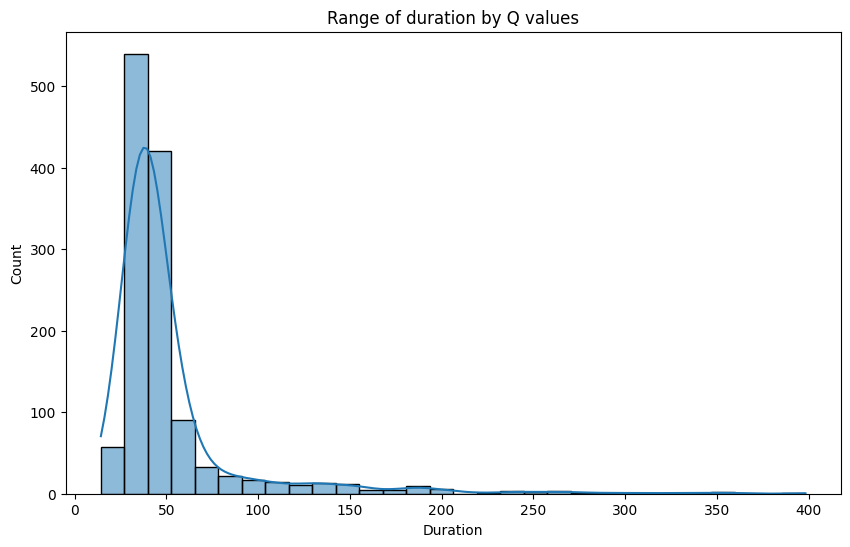

In [21]:
histplot_per_columns(midi_metadata_df, 'duration')

Plot saved to ../data/plots/Tracks_per_Song_Distribution.png


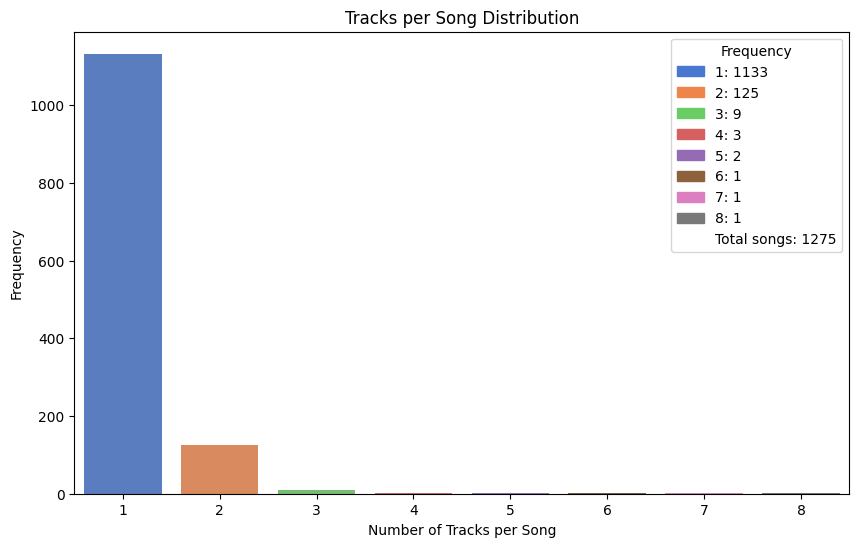

In [12]:
plot_tracks_distribution(midi_metadata_df)

Plot saved to ../data/plots/Quaters_Distribution.png


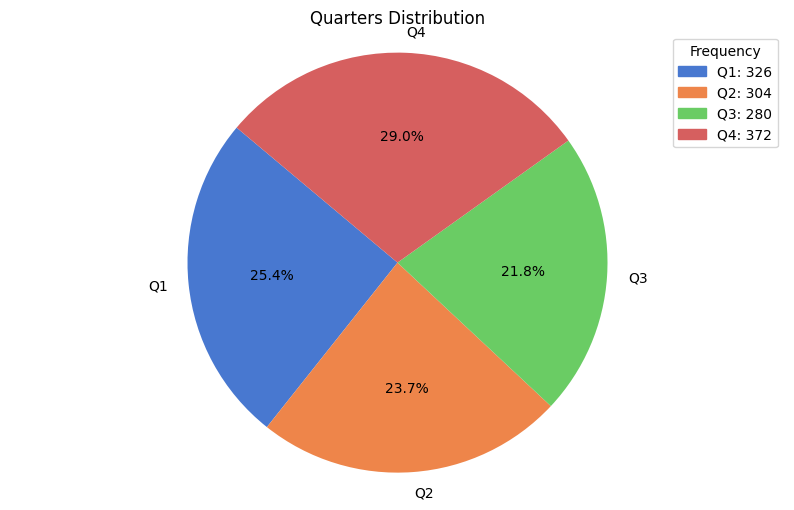

In [13]:
csv_metadata_df = load_json(csv_metadata)
plot_q_distribution(csv_metadata_df)

Plot saved to ../data/plots/Range_of_note_density_Violin_Plot.png


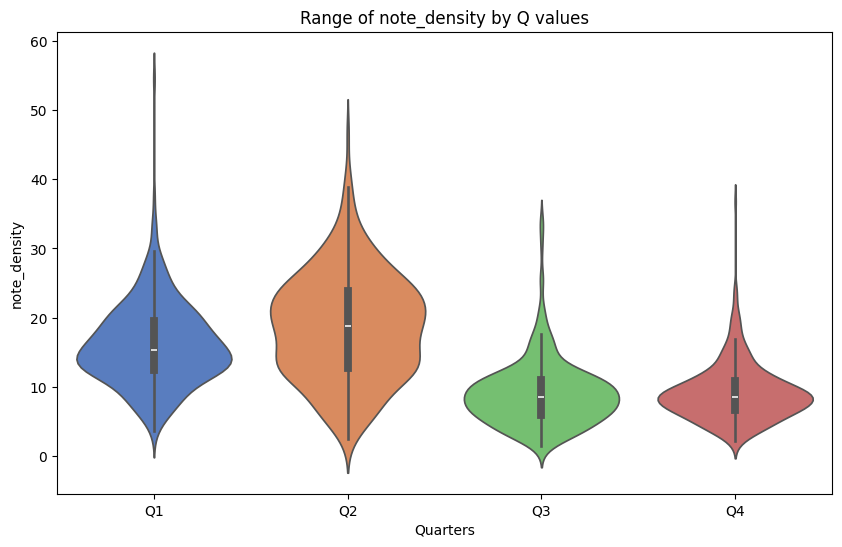

Plot saved to ../data/plots/Range_of_tempo_x_Violin_Plot.png


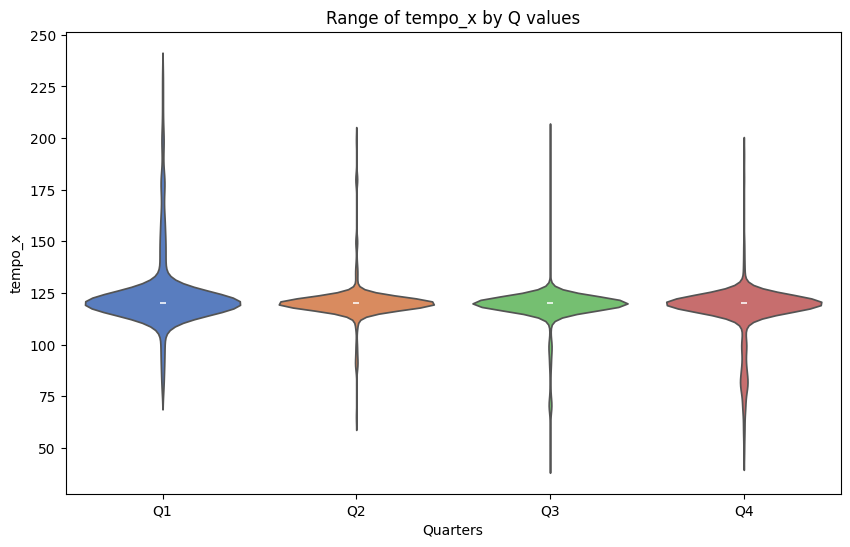

In [14]:
merged_df = pd.merge(midi_metadata_df, csv_metadata_df, on='name')
plot_value_range_per_Q(merged_df, 'note_density')
plot_value_range_per_Q(merged_df, 'tempo_x')